In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('regress_data2.csv')

data.head()
X = data[['面积', '房间数']]
y = data['价格']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

def compute_gradients(X, y, y_pred):
    m = len(y)
    gradient_b = (2/m) * np.sum((y_pred - y))
    gradient_w = (2/m) * np.dot(X.T, (y_pred - y))
    return gradient_b, gradient_w

def gradient_descent(X, y, learning_rate, epochs):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b
        loss = compute_loss(y, y_pred)
        gradient_b, gradient_w = compute_gradients(X, y, y_pred)
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        loss_history.append(loss)

    return w, b, loss_history

learning_rate = 0.01
epochs = 1000
w, b, loss_history = gradient_descent(X_train_scaled, y_train, learning_rate, epochs)

# Predict and compute loss
y_train_pred = np.dot(X_train_scaled, w) + b
y_test_pred = np.dot(X_test_scaled, w) + b
train_loss = compute_loss(y_train, y_train_pred)
test_loss = compute_loss(y_test, y_test_pred)

train_loss, test_loss

(3058269563.389661, 8609870005.254139)

In [4]:
def gradient_descent_l2(X, y, learning_rate, epochs, lambda_reg):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b
        loss = compute_loss(y, y_pred) + (lambda_reg / (2 * n_samples)) * np.sum(np.square(w))
        gradient_b, gradient_w = compute_gradients(X, y, y_pred)
        gradient_w += (lambda_reg / n_samples) * w
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        loss_history.append(loss)

    return w, b, loss_history

lambda_reg = 0.1
w_l2, b_l2, loss_history_l2 = gradient_descent_l2(X_train_scaled, y_train, learning_rate, epochs, lambda_reg)

y_train_pred_l2 = np.dot(X_train_scaled, w_l2) + b_l2
y_test_pred_l2 = np.dot(X_test_scaled, w_l2) + b_l2
train_loss_l2 = compute_loss(y_train, y_train_pred_l2)
test_loss_l2 = compute_loss(y_test, y_test_pred_l2)

train_loss_l2, test_loss_l2


(3058313438.978295, 8605356654.111929)

In [5]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

w_normal = normal_equation(X_train_scaled, y_train)
b_normal = np.mean(y_train - np.dot(X_train_scaled, w_normal))

y_train_pred_normal = np.dot(X_train_scaled, w_normal) + b_normal
y_test_pred_normal = np.dot(X_test_scaled, w_normal) + b_normal
train_loss_normal = compute_loss(y_train, y_train_pred_normal)
test_loss_normal = compute_loss(y_test, y_test_pred_normal)

train_loss_normal, test_loss_normal


(3058269204.3101807, 8610424544.777674)

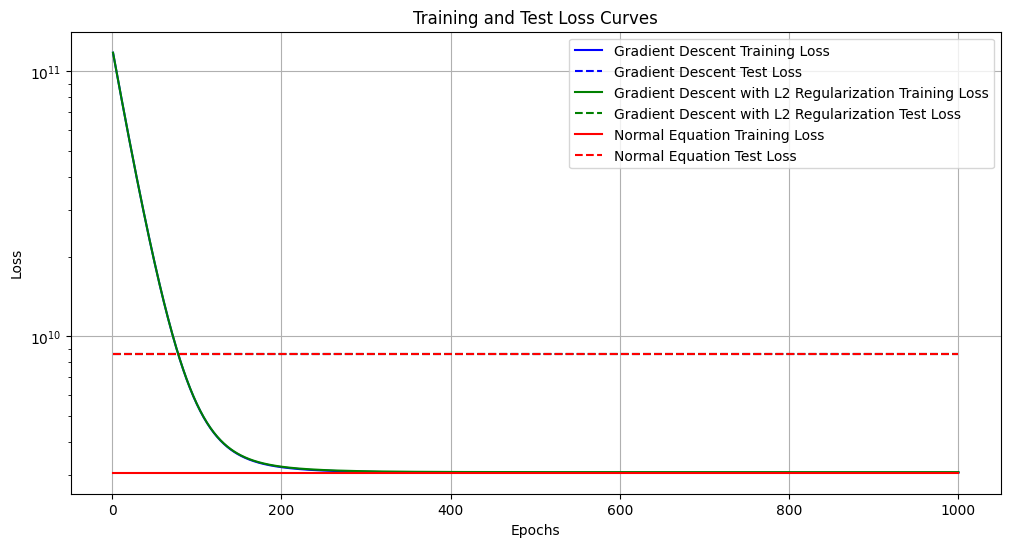

In [6]:
epochs_list = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.plot(epochs_list, loss_history, label='Gradient Descent Training Loss', color='blue')
plt.plot(epochs_list, [test_loss] * epochs, label='Gradient Descent Test Loss', linestyle='--', color='blue')

plt.plot(epochs_list, loss_history_l2, label='Gradient Descent with L2 Regularization Training Loss', color='green')
plt.plot(epochs_list, [test_loss_l2] * epochs, label='Gradient Descent with L2 Regularization Test Loss', linestyle='--', color='green')

plt.plot(epochs_list, [train_loss_normal] * epochs, label='Normal Equation Training Loss', linestyle='-', color='red')
plt.plot(epochs_list, [test_loss_normal] * epochs, label='Normal Equation Test Loss', linestyle='--', color='red')

plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.grid(True)
plt.show()